Importing dependencies

In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt

API login

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

Importing data

In [3]:
data = te.getIndicatorData(
    country='all',
    indicators=['coronavirus deaths', 'coronavirus cases', 'coronavirus recovered'],
    output_type='df'
)

covid_deaths = data[data['Category']=='Coronavirus Deaths']
covid_cases = data[data['Category']=='Coronavirus Cases']
covid_recovered = data[data['Category']=='Coronavirus Recovered']

Data manipulation

In [4]:
covid_deaths = covid_deaths[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Deaths (millions)'}).set_index('Country')
covid_cases = covid_cases[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Cases (millions)'}).set_index('Country')
covid_recovered = covid_recovered[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Recovered (millions)'}).set_index('Country')

covid_deaths['Deaths (millions)'] = covid_deaths['Deaths (millions)'].apply(lambda x: x/1000000)
covid_cases['Cases (millions)'] = covid_cases['Cases (millions)'].apply(lambda x: x/1000000)
covid_recovered['Recovered (millions)'] = covid_recovered['Recovered (millions)'].apply(lambda x: x/1000000)

df = covid_deaths.join(covid_cases, lsuffix='_covid_deaths', rsuffix='_covid_cases')
df = df.join(covid_recovered, lsuffix='_df', rsuffix='_covid_recovered')

df = df[['Recovered (millions)', 'Cases (millions)', 'Deaths (millions)']]

df.sort_values(['Cases (millions)', 'Deaths (millions)'], ascending=False, inplace=True)
df.drop('World', inplace=True)
df = df.head(10)
df

,Recovered (millions),Cases (millions),Deaths (millions)
Country,,,
United States,16.278460,33.566052,0.602465
India,29.128267,30.134445,0.393310
Brazil,16.511701,18.054653,0.504717
France,0.381278,5.760002,0.110858
Russia,4.929639,5.409088,0.132064
Turkey,3.575586,5.393248,0.049473
United Kingdom,0.000344,4.651988,0.128008
Argentina,3.967633,4.298782,0.090281
Italy,4.066029,4.254294,0.127322


Plotting

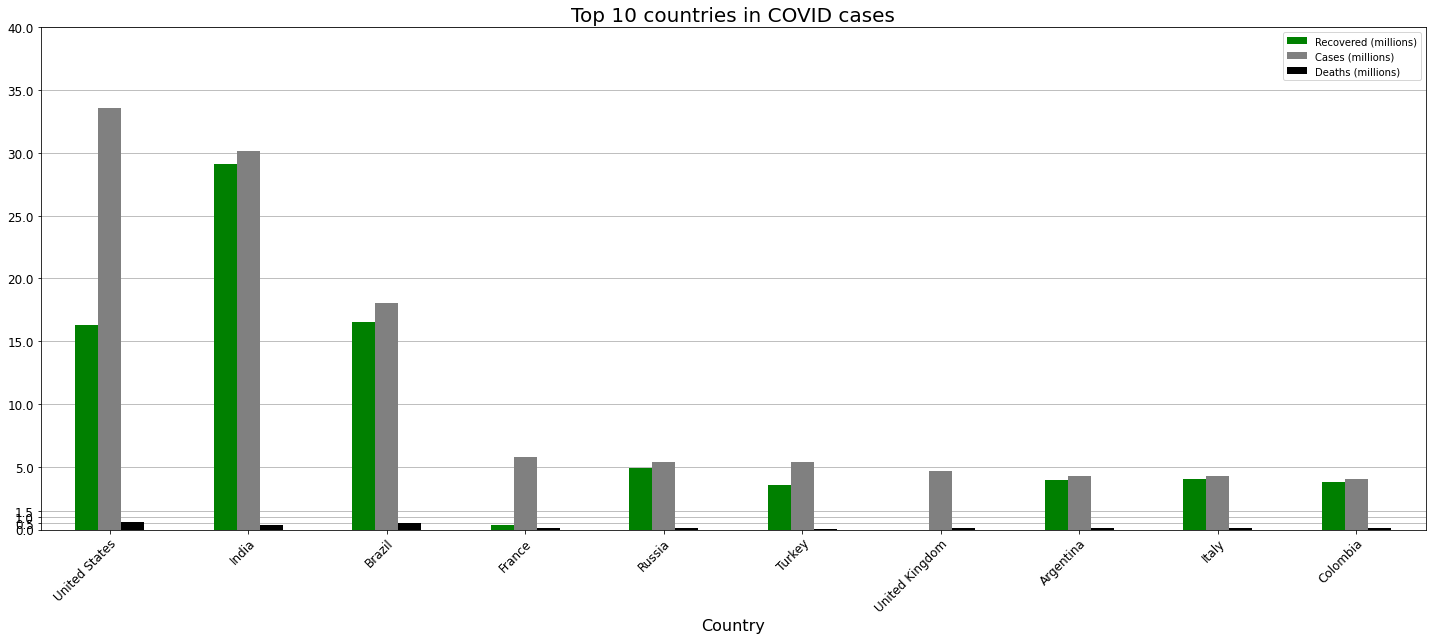

In [5]:
color_dict = {'Deaths (millions)': 'black', 'Cases (millions)': 'grey', 'Recovered (millions)': 'green'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [0.5, 1, 1.5])
ax.yaxis.grid(zorder=0)
ax.set_title('Top 10 countries in COVID cases', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()